In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.drop(['customerID'], axis=1, inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#we have to convert Total charges into int
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [5]:
pd.to_numeric(df.TotalCharges,errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [6]:
pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df.shape

(7043, 20)

In [9]:
df = df[df.TotalCharges!= ' ']
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
df.shape

(7032, 20)

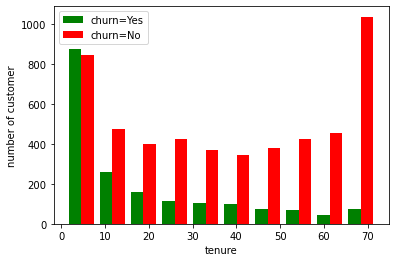

In [11]:
tenure_churn_no =  df[df.Churn=='No'].tenure
tenure_churn_yes =  df[df.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('number of customer')

plt.hist([tenure_churn_yes,tenure_churn_no], color = ['green','red'],label=['churn=Yes','churn=No'])
plt.legend()

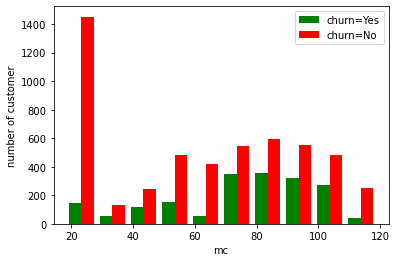

In [12]:
mc_churn_no =  df[df.Churn=='No'].MonthlyCharges
mc_churn_yes =  df[df.Churn=='Yes'].MonthlyCharges

plt.xlabel('mc')
plt.ylabel('number of customer')

plt.hist([mc_churn_yes,mc_churn_no], color = ['green','red'],label=['churn=Yes','churn=No'])
plt.legend()

In [13]:
for column in df:
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [14]:
df.replace('No phone service', 'No',inplace=True)
df.replace('No internet service', 'No',inplace=True)


C:\Users\Rutvik\AppData\Local\Temp\ipykernel_6880\2122551173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('No phone service', 'No',inplace=True)
C:\Users\Rutvik\AppData\Local\Temp\ipykernel_6880\2122551173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('No internet service', 'No',inplace=True)


In [15]:
yes_no_column = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                 'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_column:
    df[col].replace({'Yes':1,'No':0}, inplace= True)
    

C:\Users\Rutvik\AppData\Local\Temp\ipykernel_6880\1003882762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].replace({'Yes':1,'No':0}, inplace= True)


In [16]:
for column in df:
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : [0 1]


In [17]:
df['gender'].replace({'Female':1,'Male':1}, inplace= True)


C:\Users\Rutvik\AppData\Local\Temp\ipykernel_6880\2700565371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'].replace({'Female':1,'Male':1}, inplace= True)


In [18]:
df  = pd.get_dummies(data=df,columns=['InternetService','PaymentMethod','Contract'])


In [19]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,0,0,1,0,1,0
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [20]:
col_to_scale = ['MonthlyCharges','TotalCharges','tenure']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

In [21]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,0,0,1,0,1,0
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [22]:
x = df.drop('Churn', axis=1)
y = df['Churn']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=5)

In [24]:
x_train.shape

(5625, 26)

In [25]:
x_test.shape

(1407, 26)

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout

#build an artificial neural network 

model = Sequential()
model.add(Dense(32,input_shape=(26,), activation = 'relu'))
model.add(Dense(50, activation = 'relu'))

model.add(Dropout(0.5))
model.add(Dense(18, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))



model.compile(optimizer='adam',loss = 'BinaryCrossentropy', metrics = ['accuracy'])

In [75]:
model.fit(x_train,y_train,epochs=200)

Epoch 1/200
176/176 [==============================] - 1s 3ms/step - loss: 0.5710 - accuracy: 0.6923
Epoch 2/200
176/176 [==============================] - 0s 3ms/step - loss: 0.4698 - accuracy: 0.7595
Epoch 3/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.7700
Epoch 4/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.7815
Epoch 5/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.7920
Epoch 6/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.7943
Epoch 7/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.7900
Epoch 8/200
176/176 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.7961
Epoch 9/200
176/176 [==============================] - 0s 3ms/step - loss: 0.4283 - accuracy: 0.7989
Epoch 10/200
176/176 [==============================] - 1s 3ms/step - loss: 0.4256 - accura

176/176 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8313
Epoch 82/200
176/176 [==============================] - 0s 3ms/step - loss: 0.3619 - accuracy: 0.8306
Epoch 83/200
176/176 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8270
Epoch 84/200
176/176 [==============================] - 0s 2ms/step - loss: 0.3597 - accuracy: 0.8320
Epoch 85/200
176/176 [==============================] - 0s 2ms/step - loss: 0.3600 - accuracy: 0.8281
Epoch 86/200
176/176 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8288
Epoch 87/200
176/176 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8336
Epoch 88/200
176/176 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8309
Epoch 89/200
176/176 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8327
Epoch 90/200
176/176 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 

176/176 [==============================] - 1s 3ms/step - loss: 0.3363 - accuracy: 0.8379
Epoch 161/200
176/176 [==============================] - 1s 4ms/step - loss: 0.3402 - accuracy: 0.8421
Epoch 162/200
176/176 [==============================] - 1s 3ms/step - loss: 0.3403 - accuracy: 0.8380
Epoch 163/200
176/176 [==============================] - 1s 3ms/step - loss: 0.3406 - accuracy: 0.8423
Epoch 164/200
176/176 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.8388
Epoch 165/200
176/176 [==============================] - 1s 4ms/step - loss: 0.3366 - accuracy: 0.8402
Epoch 166/200
176/176 [==============================] - 1s 4ms/step - loss: 0.3342 - accuracy: 0.8455
Epoch 167/200
176/176 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8421
Epoch 168/200
176/176 [==============================] - 1s 3ms/step - loss: 0.3330 - accuracy: 0.8396
Epoch 169/200
176/176 [==============================] - 0s 2ms/step - loss: 0.3316 - a

In [76]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.5073 - accuracy: 0.7626


[0.5073376893997192, 0.7626155018806458]

In [77]:
y_predict = model.predict(x_test)

44/44 [==============================] - 0s 1ms/step


In [78]:
y_predict[:5]


array([[0.47416583],
       [0.42124185],
       [0.03831359],
       [0.42124185],
       [0.42124185]], dtype=float32)

In [79]:
y_test[0:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [80]:
y_pred = []
for i in y_predict:
    if i > 0.5 :
        y_pred.append(1)
    else:
        y_pred.append(0)

In [81]:
y_pred[:10]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [82]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [83]:
tf.math.confusion_matrix(y_pred,y_test)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[872, 207],
       [127, 201]])>